<a href="https://colab.research.google.com/github/YuliiaMan/python_for_ds_tasks/blob/main/Italian_restaurant_sales_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Аналіз продажів Італійського бістро**

**Завантаження бібліотек**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

**Встановлення бібліотеки, яка потрібна для роботи з Excel файлами з pandas**

In [2]:
!pip install openpyxl

**Шлях до даних, які записані до змінної df**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_path = '/content/drive/MyDrive/Home tasks/large_italian_restaurant_sales.xlsx'
df = pd.read_excel(data_path)

# **1. Аналіз даних перед початком роботи**



*   **Розмір даних**




In [5]:
df.shape

(10000, 9)



*   **Перегляд набору даних**




In [6]:
pd.concat([df.head(3), df.tail(3)])

,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type
0,2024-11-23,03:48 AM,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In
1,2024-03-12,03:29 AM,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway
2,2024-01-17,01:01 AM,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery
9997,2024-10-29,03:21 AM,Lasagna,Main Course,1,11.5,11.5,Credit Card,Delivery
9998,2024-11-08,11:18 PM,Caprese Salad,Appetizer,1,8.0,8.0,Credit Card,Delivery
9999,2024-11-15,03:25 PM,Tiramisu,Dessert,5,6.5,32.5,Credit Card,Delivery




*   **Перегляд типів даних**








In [7]:
df.dtypes

,0
Date,object
Time,object
Menu Item,object
Category,object
Quantity,int64
Price (per item),float64
Revenue,float64
Payment Method,object
Customer Type,object


Колонка Date містить тип даних object, який необхідно змінити на тип datetime64[ns].



*   **Зміна типу даних колонки Date**




In [8]:
df['Date'] = pd.to_datetime(df['Date'])





*   **Перевірка типу даних колонки Date**







In [9]:
print(df['Date'].dtype)

datetime64[ns]




*   **Перевірка на пропущені значення**




In [10]:
df.isna().sum()

,0
Date,0
Time,0
Menu Item,0
Category,0
Quantity,0
Price (per item),0
Revenue,0
Payment Method,0
Customer Type,0


Пропущені значення відсутні.



*   **Перевірка на дублі**




In [11]:
df[df.duplicated()]

,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type


Дублі в наборі даних відсутні.



*   **Відокремлення місяця із колонки Date**




In [12]:
df['Month'] = df['Date'].dt.month

In [13]:
df[:3]

,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type,Month
0,2024-11-23,03:48 AM,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In,11
1,2024-03-12,03:29 AM,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway,3
2,2024-01-17,01:01 AM,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery,1


# **2. Аналіз продажів, доходу та оцінка ефективності меню.**

**Питання 1. Переглянемо, які є категорії в меню і який дохід вони приносять.**

In [14]:
df.groupby(['Category'])['Revenue'].sum().sort_values(ascending=False)

,Revenue
Category,
Main Course,139581.5
Appetizer,57608.0
Dessert,50541.0


Найпопулярніша категорія меню, що приносить найбільший дохід – Main Course (Основне меню).

**Рекомендації:** звернути увагу на оформлення меню категорій: закуски (Appetizer) та десерти (Dessert), які мають менший дохід. Розглянути підбір меню під цільову аудиторію (пенсіонери, діти, студенти), оптимізація цін, акційні пропозиції.


**Питання 2. Яким стравам відвідувачі надають перевагу?**

In [15]:
df.groupby(['Menu Item'])['Quantity'].sum().sort_values(ascending=False)

,Quantity
Menu Item,
Tiramisu,3148
Fettuccine Alfredo,3089
Panna Cotta,3016
Lasagna,2999
Gelato,2998
Minestrone Soup,2990
Spaghetti Carbonara,2983
Margherita Pizza,2914
Bruschetta,2822


Найбільш привабливими стравами для відвідувачів є Tiramisu, Fettuccine Alfredo, Panna Cotta. Відповідно найменш привабливими є Bruschetta та Caprese Salad.

**Рекомендації**: зробити опитування відвідувачів, які замовили менш привабливі страви, щоб зрозуміти, чого не вистачає в цих стравах, для можливої зміни їх рецептури.




**Питання 3. Динаміка доходу та продажів по місяцям за категоріями меню.**



*   **Динаміка доходу по місяцям**




In [16]:
revenue_pivot = df.pivot_table(index = 'Month', columns = 'Category', values = 'Revenue', aggfunc = 'sum').round(2)

In [17]:
revenue_pivot
display(revenue_pivot.style.format("{:.2f}").background_gradient(low=0.75, high=1.0))

Category,Appetizer,Dessert,Main Course
Month,,,
1,3873.00,4570.50,11428.00
2,4680.00,3568.50,10864.50
3,5081.00,4178.50,11958.00
4,5054.00,4314.00,11153.50
5,4783.00,4040.50,11791.00
6,4908.00,4670.50,9532.00
7,4840.00,4597.00,11973.50
8,4475.00,4098.50,14254.00
9,4994.00,4497.50,10918.00


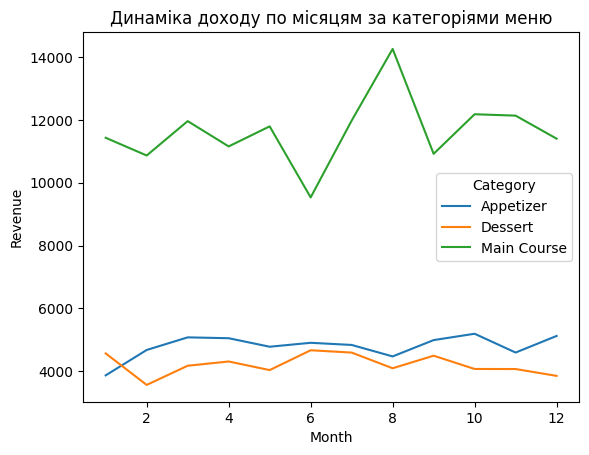

In [18]:
revenue_pivot.plot()
plt.title('Динаміка доходу по місяцям за категоріями меню')
plt.xlabel('Month')
plt.ylabel('Revenue');

*   **Динаміка продажів по місяцям**

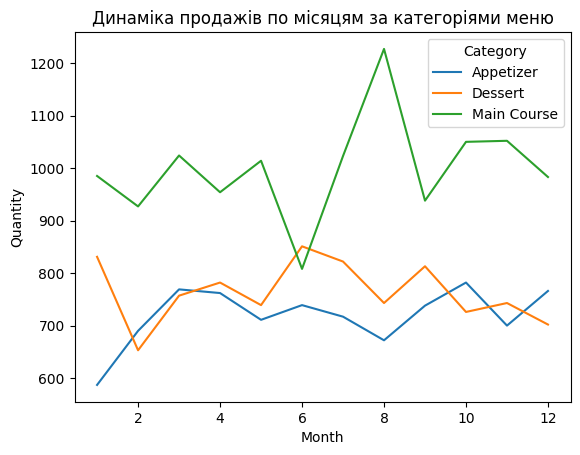

In [19]:
quantity_pivot = df.pivot_table(index = 'Month', columns = 'Category', values = 'Quantity', aggfunc = 'sum')
quantity_pivot.plot()
plt.title('Динаміка продажів по місяцям за категоріями меню')
plt.xlabel('Month')
plt.ylabel('Quantity');

Основним джерелом прибутку є Main Course (Основні страви). Лінія для Main Course (зелена) значно вища, ніж для інших категорій. У серпні спостерігається пік прибутку, після чого йде спад. Можливо, у цьому місяці були акції, сезонний попит або якісь події, що вплинули на продажі. Червень – помітний спад у Main Course.

Appetizer (закуски) та Dessert (десерти) мають значно нижчий рівень прибутку, проте вони демонструють стабільність, що може бути плюсом для прогнозування продажів. Динаміка закусок виглядає трохи кращою за десерти та приносить більший дохід. Найменший прибуток надходить від десертів.

На другому графіку можна помітити, що десертів замовляють більше, ніж закусок. Тобто, попит на десерти більший, ніж на закуски, але при цьому дохід від їх продажів менший. Це свідчить про їх меншу вартість.

**Рекомендації**: Дослідити, чому серпень був таким прибутковим для основних страв і чи можна повторити цей ефект. Проаналізувати, чому десерти мають найнижчий рівень прибутку. Можливо, варто розглянути підвищення цін на десерти, переглянути меню або зробити спеціальні пропозиції. Закуски мають стабільний прибуток, але без сплесків. Можна протестувати нові позиції або маркетингові стратегії для підвищення продажів.


**Питання 4. Визначення періодів пікових продажів.**



*   **Розподіл продажів за годинами**




In [20]:
# Перетворення в datetime
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')
# Виділення лише години
df['Hour'] = df['Time'].dt.hour

In [21]:
# Підрахунок доходу за годинами
hourly_sales = df.groupby('Hour')['Revenue'].sum().reset_index()

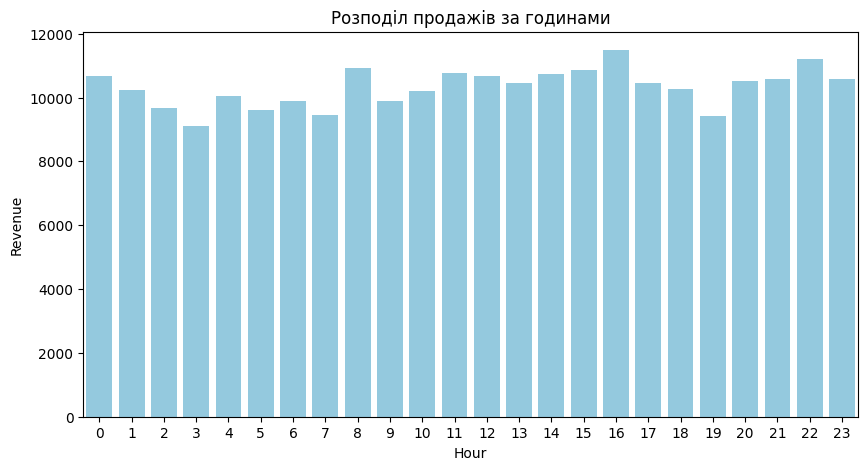

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=hourly_sales, x='Hour', y='Revenue', color='skyblue')
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.title("Розподіл продажів за годинами")
plt.show()

Замовлення розподілені рівномірно протягом доби. Це може означати, що кафе працює цілодобово або має постійний потік клієнтів. Найбільше замовлень о 8:00, 16:00 та 22:00.

8:00 – можливий сніданковий пік (люди приходять за кавою та сніданком).

16:00 – підйом може свідчити про вечірній чай/каву або перекуси після роботи.

22:00 – активність може бути пов’язана з вечірніми зустрічами, пізніми перекусами у нічні зміни.

Немає сильної різниці між денними та нічними годинами. Можливо ресторан знаходиться в туристичному районі або місце, популярне серед людей, які працюють у нічну зміну.




*   **Розподіл продажів за днями тижня**




In [23]:
# додаємо колонку з днем тижня
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()

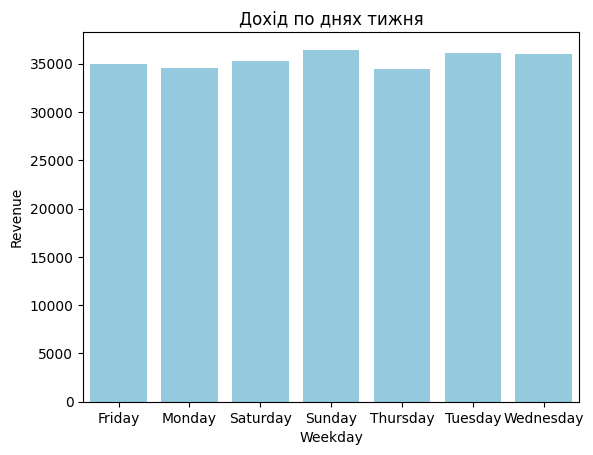

In [24]:
# Підрахунок доходу за днями тижня
weekday_sales = df.groupby('Weekday')['Revenue'].sum().reset_index()
sns.barplot(data=weekday_sales, x='Weekday', y='Revenue', color='skyblue')
plt.title("Дохід по днях тижня")
plt.show()

Замовлення розподілені майже рівномірно протягом тижня.

**Питання 5. Ефективність меню.**



*   **Аналіз продажів кожного пункту меню**




In [25]:
menu_analysis = df.groupby('Menu Item')['Quantity'].sum().sort_values(ascending=False)



*   **Оцінка прибутковості**




In [26]:
revenue_analysis = df.groupby('Menu Item')['Revenue'].sum().sort_values(ascending=False)



*   **Оцінка ефективності меню**




In [27]:
result = pd.DataFrame({'Quantity': menu_analysis, 'Revenue': revenue_analysis})
result = result.sort_values(by='Quantity', ascending=False)
print(result)

                     Quantity  Revenue
Menu Item                             
Tiramisu                 3148  20462.0
Fettuccine Alfredo       3089  40157.0
Panna Cotta              3016  16588.0
Lasagna                  2999  34488.5
Gelato                   2998  13491.0
Minestrone Soup          2990  20930.0
Spaghetti Carbonara      2983  35796.0
Margherita Pizza         2914  29140.0
Bruschetta               2822  14110.0
Caprese Salad            2821  22568.0


Лідером за кількістю продажів є десерт Tiramisu (3148 порцій), але його загальний дохід (20462) менший за інші страви, наприклад, Fettuccine Alfredo (40157). Це може бути через те, що його середня ціна нижча, або що клієнти часто обирають його як доповнення до основних страв.

Найбільший дохід приносить Fettuccine Alfredo (40157), хоча за кількістю продажів (3089) він на другому місці. Його висока ціна робить його найприбутковішим товаром у меню. Варто розглянути можливість просування цієї страви, щоб підвищити її продажі ще більше.

Дорогі, але менш популярні страви – Spaghetti Carbonara та Lasagna. Spaghetti Carbonara має 2983 продажів, але його дохід (35796) значно вищий, ніж у Minestrone Soup (20930), хоча обидва мають схожу кількість продажів. Lasagna продано 2999 разів, але її дохід (34488.5), також один із найвищих. Це означає, що ціна на ці страви є достатньо високою.

Десерти та закуски мають високий попит, але нижчий дохід. Panna Cotta продана 3016 разів, але принесла лише 16588, що говорить про її низьку ціну. Gelato та Bruschetta мають понад 2800 продажів, але їхній дохід є одним із найнижчих у списку.

**Рекомендації**:
Популярні, але недоходні страви: розглянути підвищення ціни на Tiramisu, Panna Cotta, Gelato та Bruschetta.
Дохідні, але не найбільш популярні: Fettuccine Alfredo та Spaghetti Carbonara можна активніше просувати через акції або комбо-пропозиції.
Оптимізація меню: варто переглянути низькодохідні страви Gelato, Bruschetta та інші, чи варто їх залишати в меню в поточному вигляді?



**Питання 6. Розглянемо залежність між кількістю проданих одиниць (Quantity) та виручкою (Revenue) за допомогою діаграми розсіювання.**

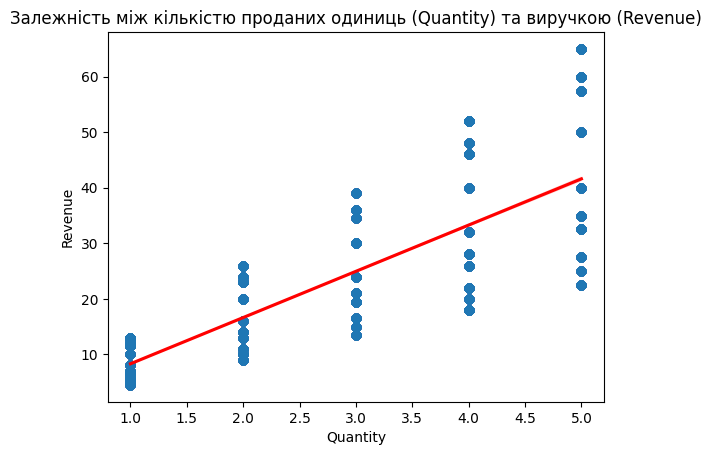

In [28]:
sns.regplot(data = df, x = 'Quantity', y = 'Revenue', scatter_kws = {'alpha': 0.4}, line_kws = {'color': 'red'})
plt.title("Залежність між кількістю проданих одиниць (Quantity) та виручкою (Revenue)");

Графік показує залежність між кількістю проданих одиниць (Quantity) та виручкою (Revenue).

Позитивна кореляція – червона лінія свідчить, що зі збільшенням кількості проданих товарів виручка також зростає. Це логічно, адже чим більше продано, тим вищий дохід.

Різний рівень доходу при однаковій кількості продажів свідчить, що для одного значення Quantity виручка варіюється. Це означає, що товари мають різні ціни.

Деякі товари мають високу виручку навіть при малій кількості продажів – на графіку є точки з високим Revenue при низькому Quantity. Це можуть бути дорогі позиції меню, які продаються рідше, але приносять більше прибутку.




**Питання 7. Перевіримо, чи є статистично значуща різниця в доході (Revenue) між двома різними способами оплати: Credit Card та Cash.**
Використаємо статистий тест z-test. Рівень статистичної значущості alpha = 0.05.

**Формулювання гіпотези:**

Н0 (нульова гіпотеза): дохід для Credit Card і Cash однаковий.

H1 (альтернативна гіпотеза): дохід для Credit Card і Cash відрізняється.

In [29]:
from statsmodels.stats.weightstats import ztest

In [30]:
# Формуємо дві вибірки за методом оплати
credit_card_revenue = df[df['Payment Method'] == 'Credit Card']['Revenue']
cash_revenue = df[df['Payment Method'] == 'Cash']['Revenue']

# Виконуємо Z-тест
z_stat, p_value = ztest(credit_card_revenue, cash_revenue)

# Виводимо результати
print(f"Z-статистика: {z_stat:.2f}")
print(f"P-значення: {p_value:.4f}")

# Перевірка гіпотези
alpha = 0.05
if p_value < alpha:
    print("Відхиляємо нульову гіпотезу. Дохід значно відрізняється для цих методів оплати.")
else:
    print("Не можемо відхилити нульову гіпотезу. Немає статистично значущої різниці між доходом для цих методів оплати.")

Z-статистика: -1.34
P-значення: 0.1812
Не можемо відхилити нульову гіпотезу. Немає статистично значущої різниці між доходом для цих методів оплати.


Таким чином, p-value є більшим ніж рівень статистичної значущості alpha. Це означає, що не можна відхилити нульову гіпотезу, оскільки немає статистично значущої різниці між доходом для методів оплати Credit Card і Cash.

**Питання 8. Перевірка кореляції між колонками з числовими показниками.**

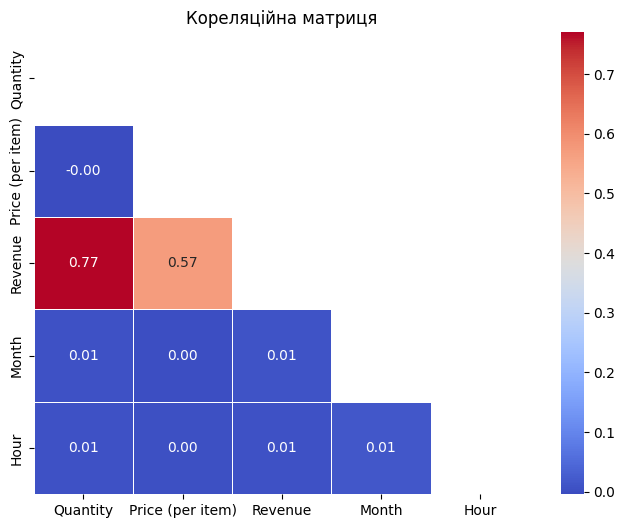

In [31]:
# Вибираємо лише числові колонки
df_numeric = df.select_dtypes(include=['number'])

# Обчислюємо кореляційну матрицю
matrix = np.triu(df_numeric.corr())

# Будуємо heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", mask=matrix, fmt=".2f", linewidths=0.5)

plt.title("Кореляційна матриця")
plt.show()

Revenue & Quantity мають позитивну кореляцію, оскільки чим більше товарів купують, тим більший дохід.
Revenue & Price (per item) також мають позитивну кореляцію, але ці показники мають більш слабкий зв’язок, а ніж попередні два показники. Дохід залежить від попиту на дорожчі страви.

**Питання 9. Аналіз Payment Method (Метод оплати).**

*  **Який метод оплати найпопулярніший? З’ясуємо це, побудувавши кругову діаграму (pie chart).**




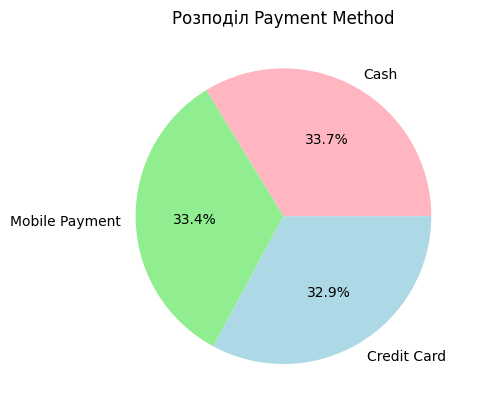

In [32]:
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightpink', 'lightgreen', 'lightblue'])

plt.title('Розподіл Payment Method')
plt.ylabel('')
plt.show()

*   **Залежність між методом оплати та виручкою**




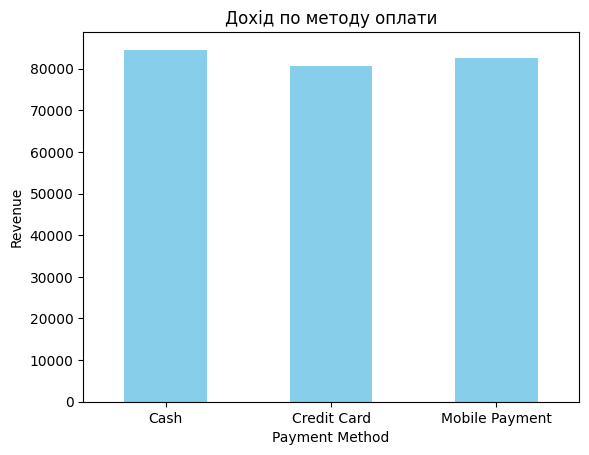

In [33]:
df.groupby('Payment Method')['Revenue'].sum().plot(kind='bar', color='skyblue')
plt.title('Дохід по методу оплати')
plt.ylabel('Revenue')
plt.xlabel('Payment Method')
plt.xticks(rotation=0)
plt.show()

Згідно двох графіків система оплати замовлень  розподілена рівномірно, але перевага все ж таки надається оплаті готівкою та мобільним розрахункам.

**Питання 10. Аналіз Customer Type (Тип клієнта)**



*   **Який тип Customer Type переважає над іншими типами**




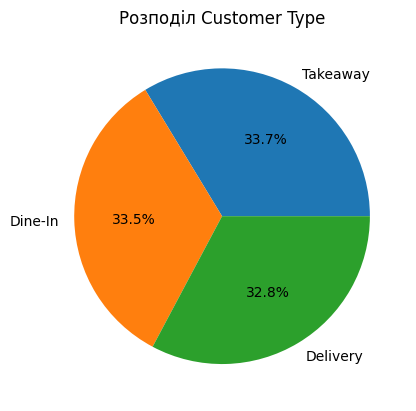

In [34]:
df['Customer Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Розподіл Customer Type')
plt.ylabel('')
plt.show()



*   **Який тип клієнта приносить найбільший дохід?**




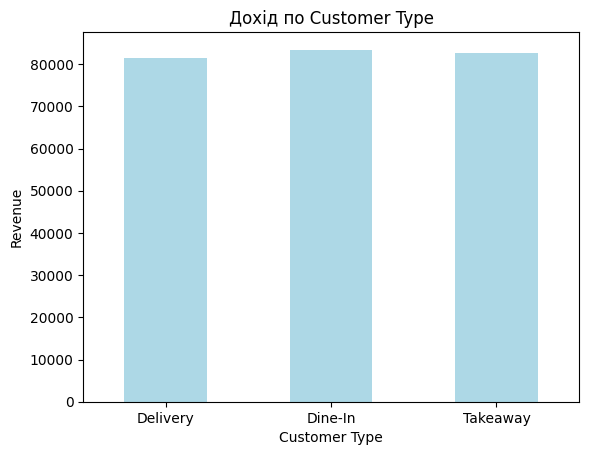

In [35]:
df.groupby('Customer Type')['Revenue'].sum().plot(kind='bar', color='lightblue')
plt.title('Дохід по Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()

Згідно двох графіків типи клієнтів розподілені рівномірно, переважає Takeaway (самовивіз) та Dine-In (відвідувачі у ресторані).

**Питання 11. Поведінка різних типів клієнтів (Customer Type) за годинами доби.**

In [36]:
pivot = df.pivot_table(index=['Customer Type'],  columns=['Hour'] , values=['Quantity'], aggfunc='sum')
display(pivot.style.background_gradient(axis=None))

Найвища активність замовлень припадає на другу половину дня (приблизно 14:00 - 23:00). Відповідно вранці і до обіду замовлень менше.

**Поведінка різних типів клієнтів:**

**Dine-In (відвідувачі в ресторані)**: найбільша активність спостерігається вранці, в обід та ввечері. Тобто більшість відвідувачів приходять на сніданок, обід та вечерю до ресторану.

**Delivery (доставка)**: найбільше замовлень в обід та ввечері, оскільки люди замовляють їжу на обід та додому після роботи. Кількість замовлень вранці значно менша.

**Takeaway (самовивіз)**: піки спостерігаються о 4-00, 10-00, 16-00 та 22-00 годинах.

**Рекомендації**: Основний дохід ресторан отримує у після обідній та вечірній час. Можна запропонувати знижки або спеціальні акції на цей період та покращити обслуговування в пікові години.

Ранковий попит нижчий, тож можливо слід додати сніданкове меню або спеціальні пропозиції. Тобто для збільшення прибутку варто посилити маркетинг у ранкові години.


# **3. Висновки та рекомендації щодо діяльності ресторану.**

*   Найпопулярніша категорія меню, що приносить найбільший дохід – Main Course
(Основне меню).

**Звернути увагу на оформлення меню категорій: закуски та десерти, які мають менший дохід. Розглянути підбір меню під цільову аудиторію (пенсіонери, діти, студенти), оптимізація цін, акційні пропозиції.**

 *   Найбільш привабливими стравами для відвідувачів є Tiramisu, Fettuccine Alfredo, Panna Cotta. Відповідно найменш привабливими є Bruschetta та Caprese Salad.

**Зробити опитування відвідувачів, які замовили менш привабливі страви, щоб зрозуміти, чого не вистачає в цих стравах, для можливої зміни їх рецептури.**

*   У серпні спостерігається пік прибутку.

**Дослідити, чому серпень був таким прибутковим для основних страв і чи можна повторити цей ефект.**

*  Appetizer (закуски) та Dessert (десерти) мають значно нижчий рівень прибутку, проте вони демонструють стабільність, що може бути плюсом для прогнозування продажів. Динаміка закусок виглядає трохи кращою за десерти та приносить більший дохід. Найменший прибуток надходить від десертів. Проте десертів замовляють більше, ніж закусок. Тобто, попит на десерти більший, ніж на закуски, але при цьому дохід від їх продажів менший. Це свідчить про їх меншу вартість.

**Проаналізувати, чому десерти мають найнижчий рівень прибутку. Можливо, варто розглянути підвищення цін на десерти, переглянути меню або зробити спеціальні пропозиції. Закуски мають стабільний прибуток, але без сплесків. Можна протестувати нові позиції або маркетингові стратегії для підвищення продажів.**

*  Замовлення розподілені рівномірно протягом доби. Немає сильної різниці між денними та нічними годинами. Це може означати, що кафе працює цілодобово або має постійний потік клієнтів.

*  Оцінка ефективності меню показала, що є дві категорії страв:
популярні, але недоходні страви (Tiramisu, Panna Cotta, Gelato та Bruschetta) та
дохідні, але не найбільш популярні (Fettuccine Alfredo та Spaghetti Carbonara).

**Для першої категорії варто розглянути підвищення ціни. Для другої категорії варто активніше просувати через акції або комбо-пропозиції.**

**Оптимізація меню: варто переглянути низькодохідні страви Gelato, Bruschetta та інші, чи варто їх залишати в меню в поточному вигляді?**

*  Залежність між кількістю проданих одиниць (Quantity) та виручкою (Revenue) за допомогою діаграми розсіювання показала позитивну кореляцію. Це свідчить про те, що зі збільшенням кількості проданих товарів виручка також зростає.
Різний рівень доходу при однаковій кількості продажів свідчить, що для одного значення Quantity виручка варіюється. Це означає, що товари мають різні ціни.

*  Система оплати замовлень розподілена рівномірно, але перевага все ж таки надається оплаті готівкою та мобільними розрахунками.

*  Типи клієнтів розподілені рівномірно, хоча трохи переважає їжа на винос та обіди у ресторані.

*  Найвища активність замовлень припадає на другу половину дня (приблизно 14:00 - 23:00). Відповідно вранці і до обіду замовлень менше.

**Основний дохід ресторан отримує у після обідній та вечірній час. Можна запропонувати знижки або спеціальні акції на цей період та покращити обслуговування в пікові години.**

**Ранковий попит нижчий, тож можливо слід додати сніданкове меню або спеціальні пропозиції. Тобто для збільшення прибутку варто посилити маркетинг у ранкові години.**





















